In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pywt

In [2]:
from data_provider.data_loader import Dataset_PV
from layers.MyAttention import WaveletConv1d, WaveletTransposeConv1d

In [3]:
dataset = Dataset_PV('./dataset/PV')
x = dataset[0][0][:, -1]
x = torch.tensor(x).float()

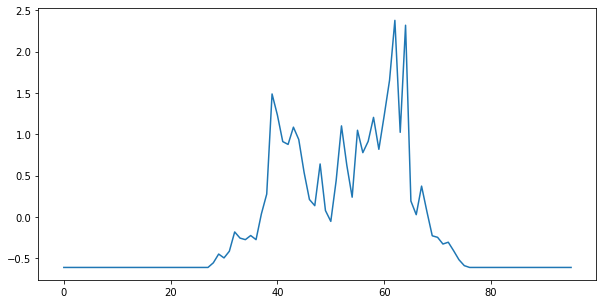

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(x)
plt.show()

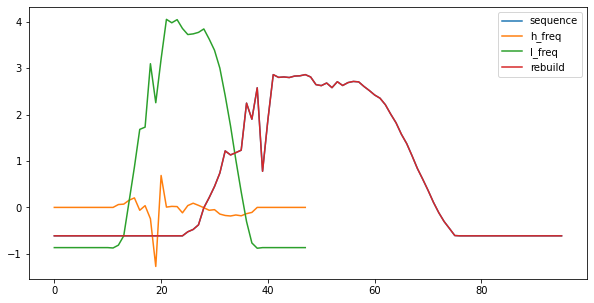

In [5]:
x = dataset[96][0][:, -1]
x = torch.tensor(x).float()
wavelet = 'bior1.3'
waveconv_h = WaveletConv1d(1, wavelet=wavelet)
waveconv_l = WaveletConv1d(1, wavelet=wavelet, high=False)
iwaveconv_l = WaveletTransposeConv1d(1, wavelet=wavelet, high=False)
iwaveconv_h = WaveletTransposeConv1d(1, wavelet=wavelet)
x_h = waveconv_h(x.unsqueeze(0).unsqueeze(-1))
x_l = waveconv_l(x.unsqueeze(0).unsqueeze(-1))
x_lh = waveconv_h(x_l)
x_ll = waveconv_l(x_l)
x_rec = (iwaveconv_l(x_l) + iwaveconv_h(x_h)).flatten()
plt.figure(figsize=(10, 5))
plt.plot(x, label='sequence')
plt.plot(x_h.flatten(), label='h_freq')
plt.plot(x_l.flatten(), label='l_freq')
# plt.plot(x_lh.flatten().detach().repeat(4), label='lh_freq')
# plt.plot(x_ll.flatten().detach().repeat(4), label='ll_freq')
plt.plot(x_rec, label='rebuild')
# plt.plot(x - x_rec, label='residual')
plt.legend()
plt.show()

In [6]:
from layers.MyAttention import MyAttentionLayer, MyAttention

In [9]:
attention = MyAttentionLayer(attention=MyAttention(48, 16, output_attention=True), d_model=2, n_heads=2, wavelet=wavelet)
x = torch.concat([x_h, x_l], dim=-1)
out, attn = attention(x, x, x)

In [11]:
import seaborn as sns

<AxesSubplot:>

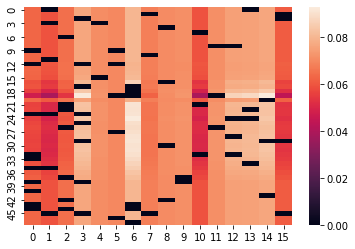

In [16]:
sns.heatmap(attn[0, 0, :, :].detach())